In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import r2_score

In [2]:
df = pd.read_excel(("dataset3.xlsx"), sheet_name = 'Sheet1')
display(df)

,Date,Industrial,Retail,Food Beverage,Export Value
0,2010-01-01,77.78,-8.37,-3.42,30371
1,2010-02-01,43.89,15.45,18.47,27406
2,2010-03-01,46.32,5.54,8.23,34387
3,2010-04-01,35.71,7.47,10.72,33959
4,2010-05-01,31.73,6.25,12.97,33729
...,...,...,...,...,...
160,2023-05-01,-15.71,17.09,45.21,45683
161,2023-06-01,-17.25,13.92,34.70,44179
162,2023-07-01,-15.46,5.34,18.65,47728
163,2023-08-01,-10.81,4.30,14.26,46035


In [3]:
df = df.drop("Date", axis = 1)
df

,Industrial,Retail,Food Beverage,Export Value
0,77.78,-8.37,-3.42,30371
1,43.89,15.45,18.47,27406
2,46.32,5.54,8.23,34387
3,35.71,7.47,10.72,33959
4,31.73,6.25,12.97,33729
...,...,...,...,...
160,-15.71,17.09,45.21,45683
161,-17.25,13.92,34.70,44179
162,-15.46,5.34,18.65,47728
163,-10.81,4.30,14.26,46035


In [4]:
df.corr()

,Industrial,Retail,Food Beverage,Export Value
Industrial,1.000000,-0.109774,-0.331915,-0.083988
Retail,-0.109774,1.000000,0.740838,0.200778
Food Beverage,-0.331915,0.740838,1.000000,0.001540
Export Value,-0.083988,0.200778,0.001540,1.000000


<Axes: >

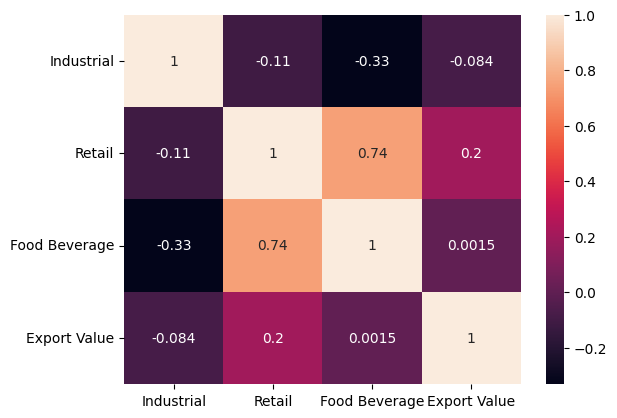

In [5]:
sns.heatmap(df.corr(), annot=True)

In [6]:
scaler_y = StandardScaler()
df["Export Value"] = scaler_y.fit_transform(df["Export Value"].to_numpy().reshape(-1, 1))

In [7]:
#scaler_x1 = StandardScaler()
#df["Industrial"] = scaler_x1.fit_transform(df["Industrial"].to_numpy().reshape(-1,1))

In [8]:
#scaler_x2 = StandardScaler()
#df["Retail"] = scaler_x2.fit_transform(df["Retail"].to_numpy().reshape(-1,1))

In [9]:
#scaler_x3 = StandardScaler()
#df["Food Beverage"] = scaler_x3.fit_transform(df["Food Beverage"].to_numpy().reshape(-1,1))
#df

In [10]:
x = df[["Industrial","Retail", "Food Beverage"]]
y = df["Export Value"]
mlr = LinearRegression()
mlr.fit(x,y)

LinearRegression()

In [11]:
mlr.coef_

array([-0.01436439,  0.09197975, -0.03175215])

In [12]:
mlr.intercept_

0.06920811895099842

In [13]:
mlr.predict(x.iloc[163,:].to_numpy().reshape(1,-1))

C:\ProgramData\anaconda3\envs\DataMining\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.16721444])

In [14]:
r2 = r2_score(y, mlr.predict(x))
r2

0.11267383345448834

In [15]:
n = 165
p = 3
upper1 = 1-r2
upper2 = n-1
upper = upper1*upper2
lower = n-p-1
eq = upper/lower
r2adj = 1-eq
r2adj

0.0961398055064353